In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# jupyter内で描画するためのおまじない
%matplotlib inline 

In [2]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


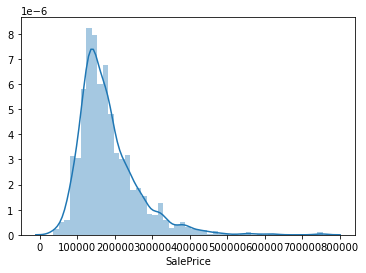

In [4]:
# SalePriceヒストグラム
sns.distplot(train['SalePrice']);

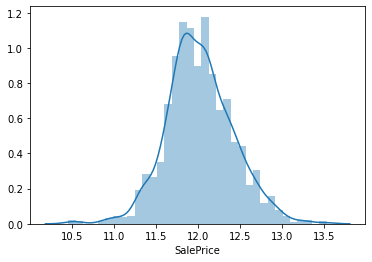

In [5]:
# データの偏りを正して正規分布にするために対数化 底をeとするa+1の対数化
# Qいろんなnotebookでやってるけど対数化ってそんなに使うの？
# なんかみんなやってるからやってみた　プラス1するのはマイナスにしないようにするためよね？
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice']);

In [6]:
# IDは別でおいとく
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values

In [8]:
# Q. EDAするときとか前処理する時に、テストデータも含めて分析したり・処理したりするけどこれは通常のデータ分析時も？
# Bambooは将来どんな感じ？

all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [9]:
# 欠損率の表示
# PoolQC みんなプールはない
# MiscFeature 他のカテゴリにないような特徴　エレベータがあるとか
# Alley　敷地内への路地通路の舗装状況　streetには面してるけど、路地はないっぽい

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
pd.DataFrame({'欠損率' :all_data_na})

,欠損率
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [10]:
# カテゴリの欠損はNaNそのものに意味があるやつ多いので無視
# 数値のやつを埋める

# LotFrontage 敷地への接道長さ　近所のやつの中央値で補間
# https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboardの受け売り
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

# GarageYrBlt ガレージの築年数
# GarageArea ガレージ面積
# GarageCars ガレージに入る車の数
# ガレージがないからNaNなので0埋め
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

# 地下室ないからNanなので0埋め
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

# 石積みベニアの面積？？　なんかなさそうなやつがNanになってそうなので0埋め
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [11]:
from sklearn.preprocessing import LabelEncoder
import pandas.api.types as ptypes

# ラベルEncodingで与えられる数値の順番って
for i in all_data.columns.values:
    if ptypes.is_string_dtype(all_data[i].dtypes):
        le = LabelEncoder()
        all_data[i] = all_data[i].fillna('None')
        le.fit(all_data[i].values)
        all_data[i] = le.transform(all_data[i].values)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,65.0,8450,1,1,3,3,0,4,...,0,0,3,4,1,0,2,2008,9,4
1,20,4,80.0,9600,1,1,3,3,0,2,...,0,0,3,4,1,0,5,2007,9,4
2,60,4,68.0,11250,1,1,0,3,0,4,...,0,0,3,4,1,0,9,2008,9,4
3,70,4,60.0,9550,1,1,0,3,0,0,...,0,0,3,4,1,0,2,2006,9,0
4,60,4,84.0,14260,1,1,0,3,0,2,...,0,0,3,4,1,0,12,2008,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,5,21.0,1936,1,1,3,3,0,4,...,0,0,3,4,1,0,6,2006,9,4
2915,160,5,21.0,1894,1,1,3,3,0,4,...,0,0,3,4,1,0,4,2006,9,0
2916,20,4,160.0,20000,1,1,3,3,0,4,...,0,0,3,4,1,0,9,2006,9,0
2917,85,4,62.0,10441,1,1,3,3,0,4,...,0,0,3,2,3,700,7,2006,9,4


In [12]:
# 床面積系を足し合わせる
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data[['TotalSF', 'GrLivArea']]
# 一応GrLivAreaとは違うっぽい

,TotalSF,GrLivArea
0,2566.0,1710
1,2524.0,1262
2,2706.0,1786
3,2473.0,1717
4,3343.0,2198
...,...,...
2914,1638.0,1092
2915,1638.0,1092
2916,2448.0,1224
2917,1882.0,970


In [13]:
# 欠損値処理かんせ〜
all_data.isnull().sum().sort_values()

MSSubClass       0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
SaleCondition    0
TotalSF          0
Length: 80, dtype: int64

In [14]:
# データを元に戻す
train = all_data[:ntrain]
test = all_data[ntrain:]

In [15]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [16]:
# 交差検証
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)
    # cvはデータの分離方法
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [17]:
# make_pipelineめっちゃ便利じゃん
# RobustScalerで外れ値考慮の標準化
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
rmsle_cv(lasso)

array([0.12563029, 0.15856098, 0.13893805, 0.12985692, 0.19870278])

In [18]:
lasso.fit(train.values, y_train)
# 対数化したやつを戻す
result = np.expm1(lasso.predict(test.values))
result

array([114429.40422132, 157083.4857116 , 166256.79202152, ...,
       152006.18936481, 112798.72347046, 239928.69738162])

In [19]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = result
# sub.to_csv('submission.csv',index=False)
# Score 0.13958

In [56]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
rmsle_cv(ENet)

array([0.12568532, 0.15849156, 0.139051  , 0.12993741, 0.19871362])

In [54]:
KRR = KernelRidge(alpha=0.6, degree=2, coef0=2.5)
rmsle_cv(KRR)

array([0.12411995, 0.15988405, 0.14062474, 0.13174082, 0.20256555])

In [21]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
rmsle_cv(GBoost)

array([0.10945459, 0.14325793, 0.13164518, 0.1089321 , 0.13457855])

In [22]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)
rmsle_cv(model_xgb)

array([0.11191503, 0.13342212, 0.12842408, 0.11436497, 0.13316672])

In [23]:
model_xgb.fit(train.values, y_train)
# 対数化したやつを戻す
result = np.expm1(model_xgb.predict(test.values))
result

array([125594.76, 161722.72, 183087.23, ..., 165934.25, 120739.49,
       218988.83], dtype=float32)

In [24]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = result
sub.to_csv('submission.csv',index=False)
# Score 0.12316

In [25]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
rmsle_cv(model_lgb)

array([0.11458096, 0.13310905, 0.13007006, 0.11443873, 0.132861  ])

In [48]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [49]:
averaged_models = AveragingModels(models = (ENet, GBoost, lasso))

# 悪化した
score = rmsle_cv(averaged_models)
score

array([0.11294071, 0.14630253, 0.13112668, 0.11710196, 0.17026315])

In [33]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [34]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1267 (0.0160)


In [36]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [37]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.061243721176909585


In [38]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = stacked_pred
sub.to_csv('submission.csv',index=False)
# Score 0.12235